# **Drift Detection and Visualization using Descriptive Statistics**

## **1. Basic imports**

In [2]:
import sys
sys.path.append('/Users/Kuba/Desktop/DriftDetectionWithExplainableAI')
from src.datasets import get_dataset

## **2. Generating data**

In [3]:
size_of_box = 1000
generator = get_dataset("hyperplane_drift")
X, y = generator.generate(size_of_box, size_of_box, 3, 2)
half = len(X)//2

X_old, X_new = X.loc[:half-1], X.loc[half:]
y_old, y_new = y[:half], y[half:]

## **3. Drift Detection and Visualization**

### **3.1. Drift detection**

In [4]:
from src.descriptive_statistics import DescriptiveStatisticsDriftDetector, StatisticsType

DSDD = DescriptiveStatisticsDriftDetector(X_old, y_old, X_new, y_new, 0.6)
print(DSDD.detect(StatisticsType.Mean))
print(DSDD.detect(StatisticsType.Min))
print(DSDD.detect(StatisticsType.Max))
print(DSDD.detect(StatisticsType.Median))
print(DSDD.detect(StatisticsType.StandardDeviation))
print(DSDD.detect(StatisticsType.ImbalanceRatio))
print(DSDD.detect([
    StatisticsType.Mean,
    StatisticsType.Min,
    StatisticsType.Max,
    StatisticsType.Median,
    StatisticsType.StandardDeviation,
    StatisticsType.ImbalanceRatio
]))

(np.True_, defaultdict(<function DescriptiveStatisticsDriftDetector._get_empty_dict.<locals>.<lambda> at 0x1192d9080>, {0: defaultdict(<class 'dict'>, {'X1': {'mean': np.True_}, 'X2': {'mean': np.True_}, 'X3': {'mean': np.False_}}), 1: defaultdict(<class 'dict'>, {'X1': {'mean': np.True_}, 'X2': {'mean': np.True_}, 'X3': {'mean': np.False_}})}))
(np.True_, defaultdict(<function DescriptiveStatisticsDriftDetector._get_empty_dict.<locals>.<lambda> at 0x1683896c0>, {0: defaultdict(<class 'dict'>, {'X1': {'min': np.True_}, 'X2': {'min': np.False_}, 'X3': {'min': np.True_}}), 1: defaultdict(<class 'dict'>, {'X1': {'min': np.True_}, 'X2': {'min': np.True_}, 'X3': {'min': np.True_}})}))
(np.False_, defaultdict(<function DescriptiveStatisticsDriftDetector._get_empty_dict.<locals>.<lambda> at 0x1683898a0>, {0: defaultdict(<class 'dict'>, {'X1': {'max': np.False_}, 'X2': {'max': np.False_}, 'X3': {'max': np.False_}}), 1: defaultdict(<class 'dict'>, {'X1': {'max': np.False_}, 'X2': {'max': np.Fal

In [5]:
DSDD.calculate_stats_before_after()

new                                                    \
                   X1                                                X2   
                  max      mean    median       min       std       max   
(label, id)                                                               
0            0.997426  0.626391  0.661377  0.002447  0.251043  0.996973   
1            0.999606  0.393708  0.358795  0.000287  0.260799  0.999908   

                                                     ...       old            \
                                                     ...        X2             
                 mean    median       min       std  ...       max      mean   
(label, id)                                          ...                       
0            0.365974  0.330026  0.000406  0.248702  ...  0.999908  0.495069   
1            0.641507  0.675023  0.006350  0.249839  ...  0.996973  0.502508   

                                                                         \
                                                 X3                       
               median       min       std       max      mean    median   
(label, id)                                                               
0            0.485370  0.000406  0.291779  0.997172  0.435848  0.422239   
1            0.502101  0.000572  0.277595  0.999572  0.561021  0.595041   

                                 
                                 
                  min       std  
(label, id)                      
0            0.001581  0.281858  
1            0.000676  0.283896  

[2 rows x 30 columns]

### **3.2. Drift Visualization**

In [6]:
from src.descriptive_statistics import plot_boxplot, plot_histogram, plot_violin, plot_qq, plot_kde, plot_ecdf, PlotOptions

#### **3.2.1. Boxplot**
##### **3.2.1.1. Boxplot with Median**

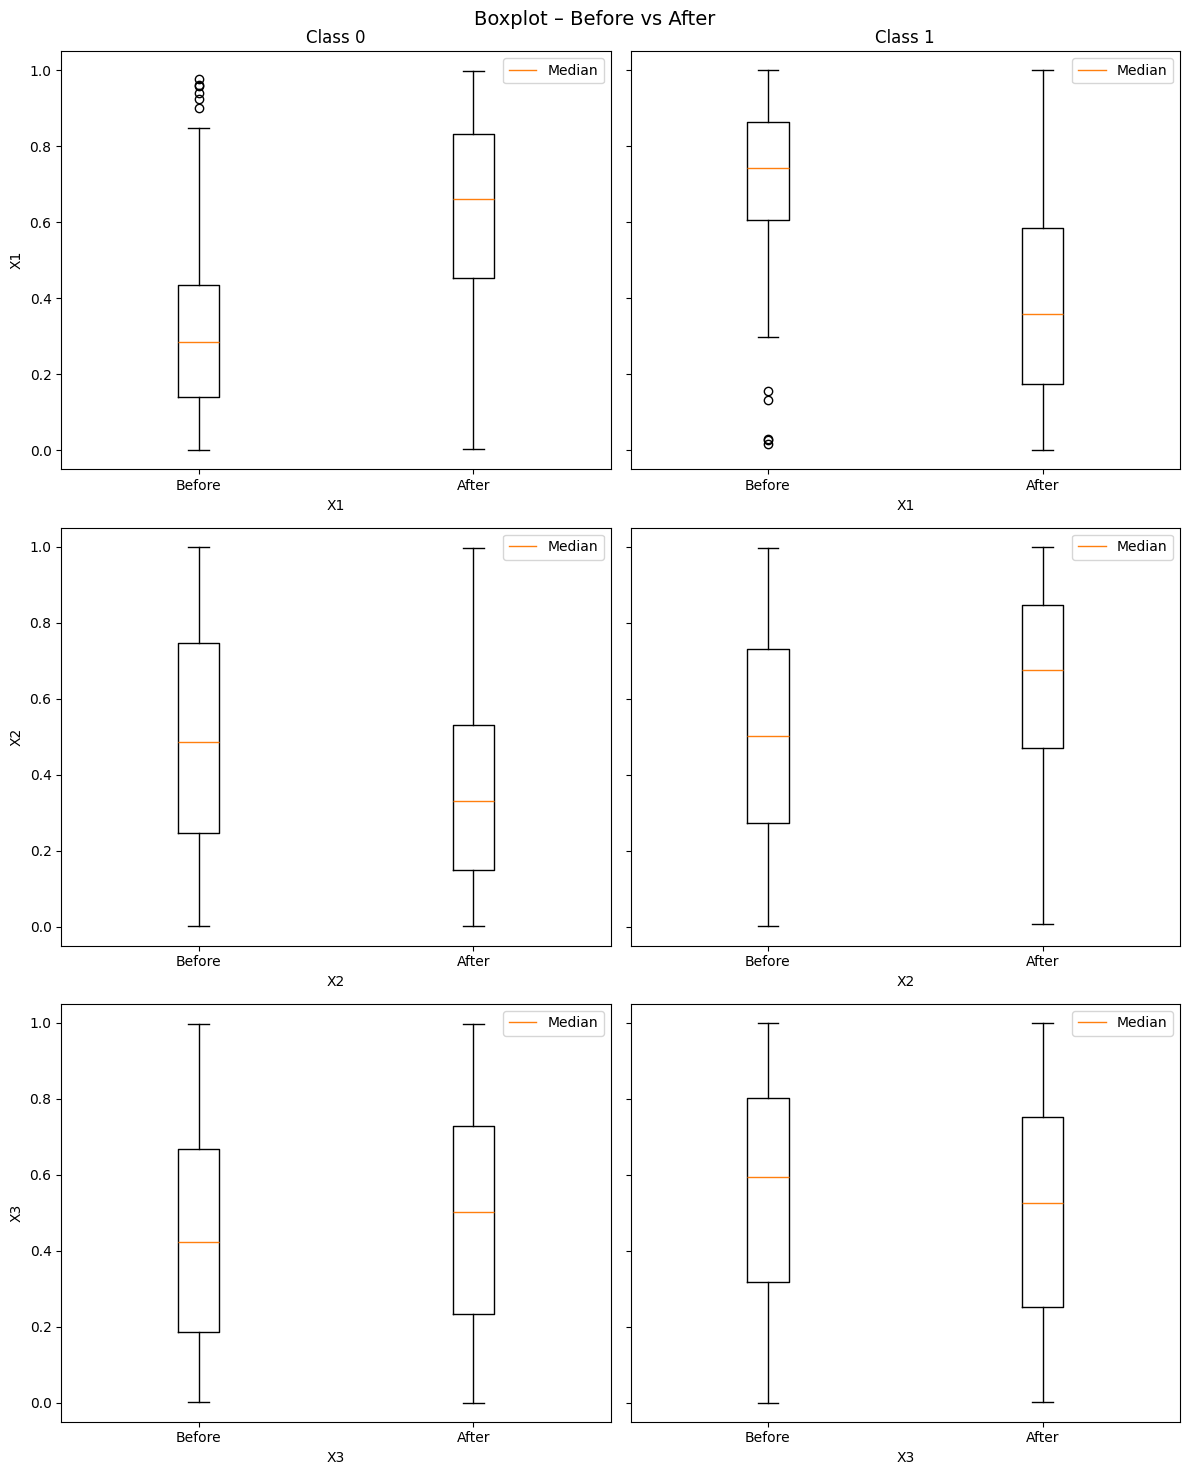

In [7]:
plot_boxplot(X_old, y_old, X_new, y_new)

##### **3.2.1.2. Boxplot with Mean**

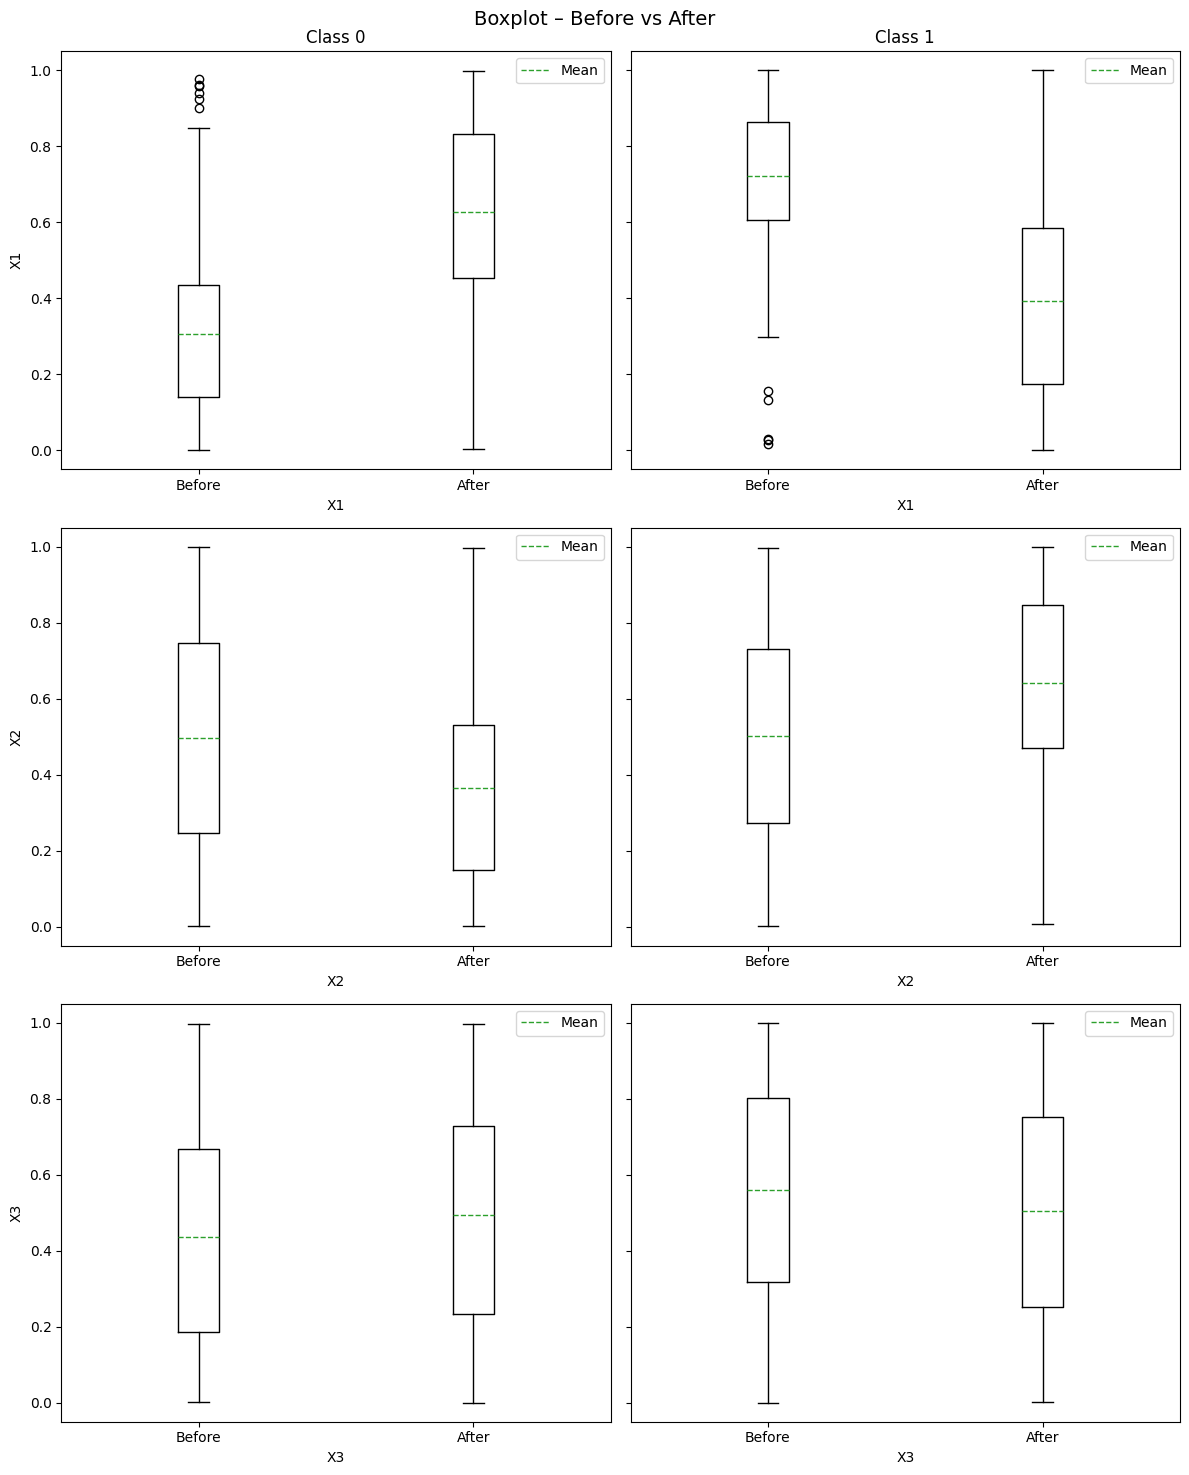

In [8]:
plot_boxplot(X_old, y_old, X_new, y_new, sharey=True, show_=PlotOptions.Mean)

##### **3.2.1.3. Boxplot with Median and Mean**

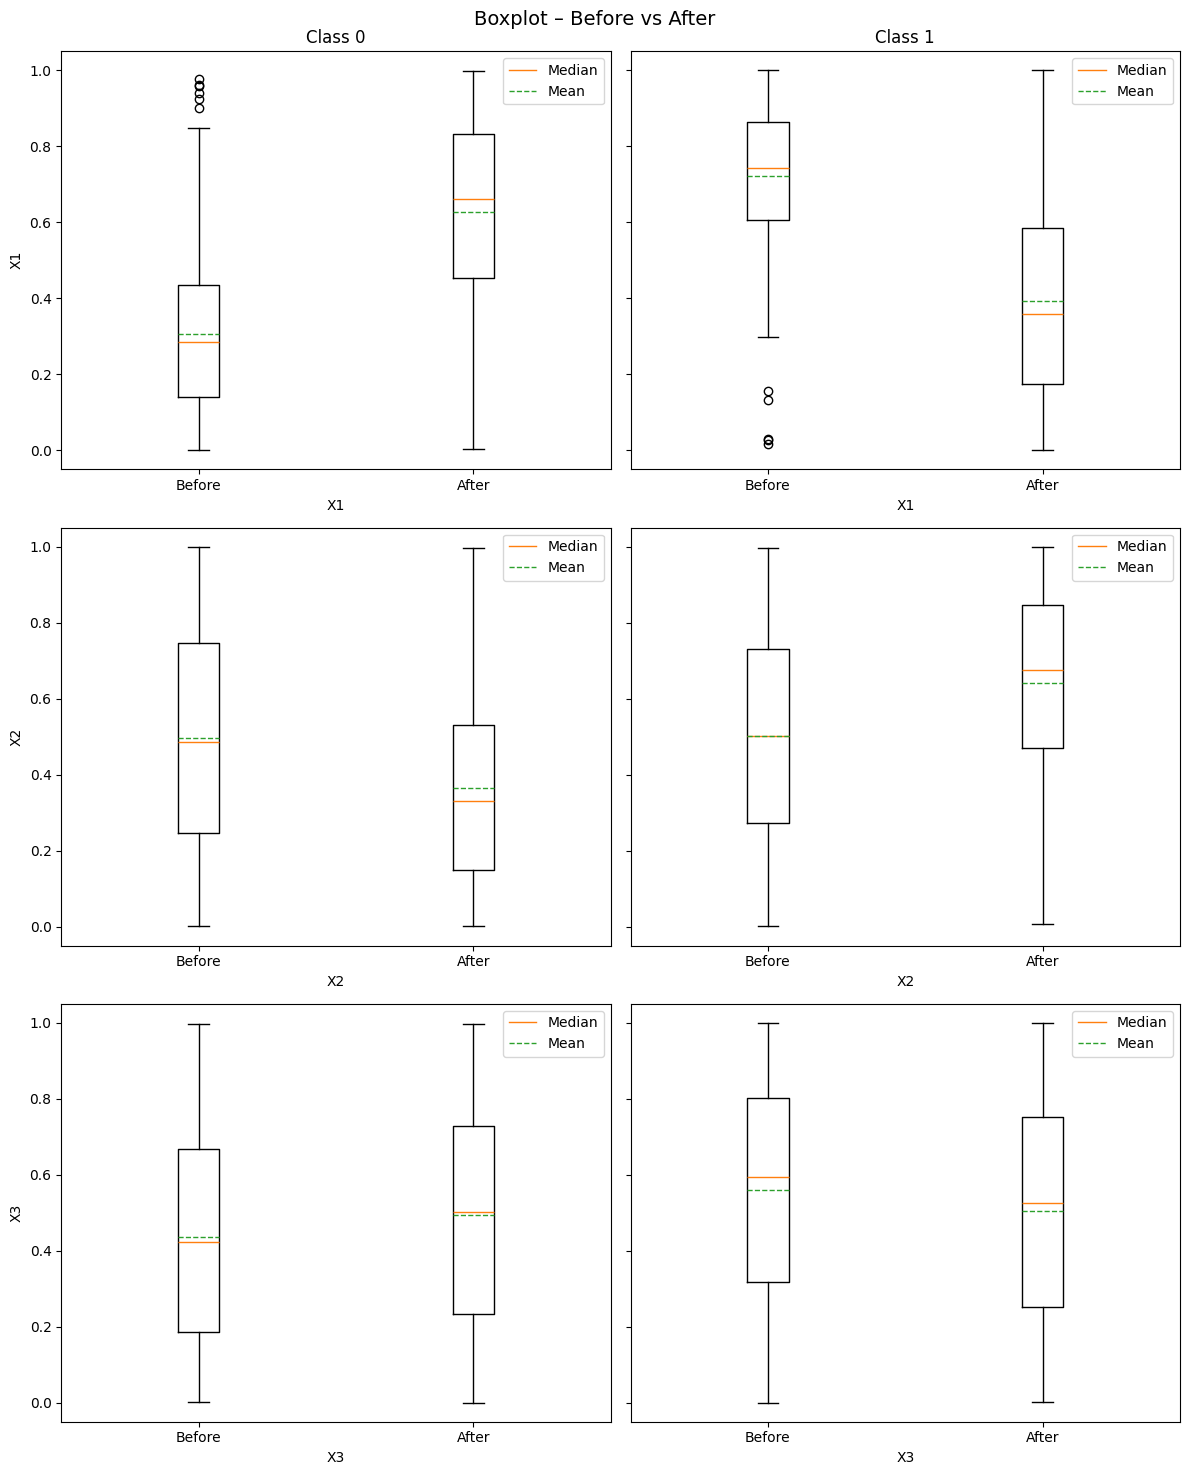

In [10]:
plot_boxplot(X_old, y_old, X_new, y_new, sharey=True, show_=PlotOptions.Both)

#### **3.2.2. Histogram**

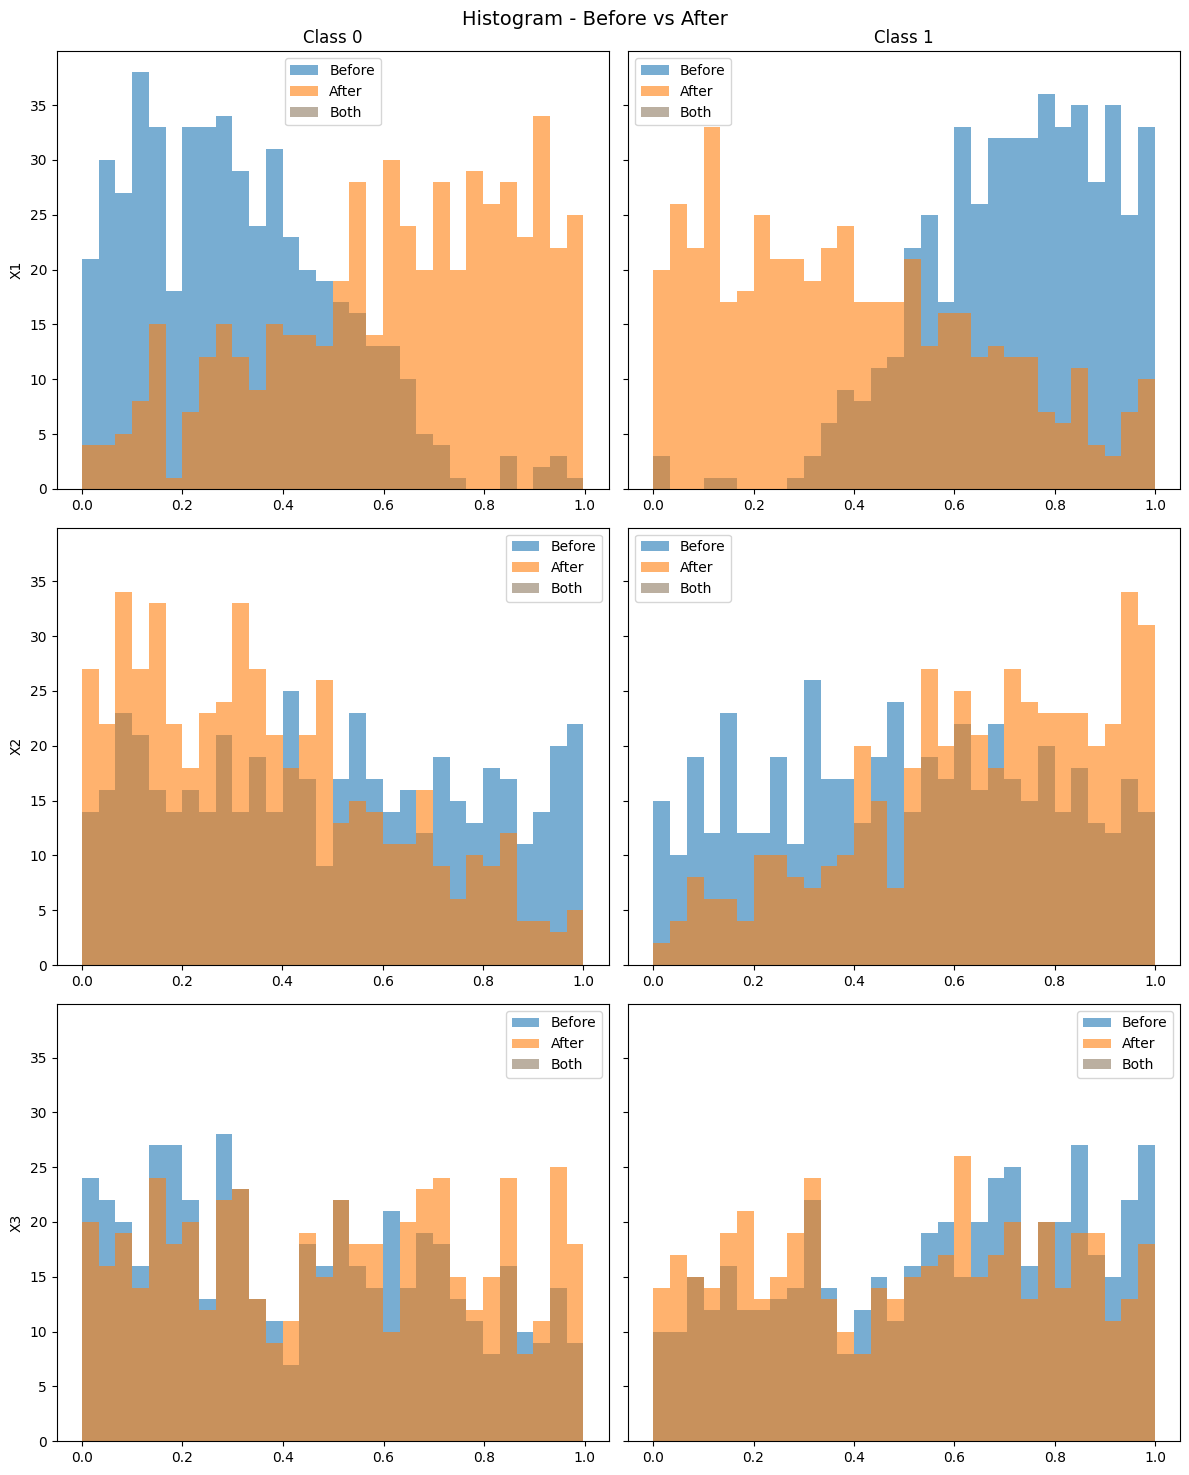

In [15]:
plot_histogram(X_old, y_old, X_new, y_new)

#### **3.2.3. Violin Plot**

##### **3.2.3.1. Violin Plot with median**

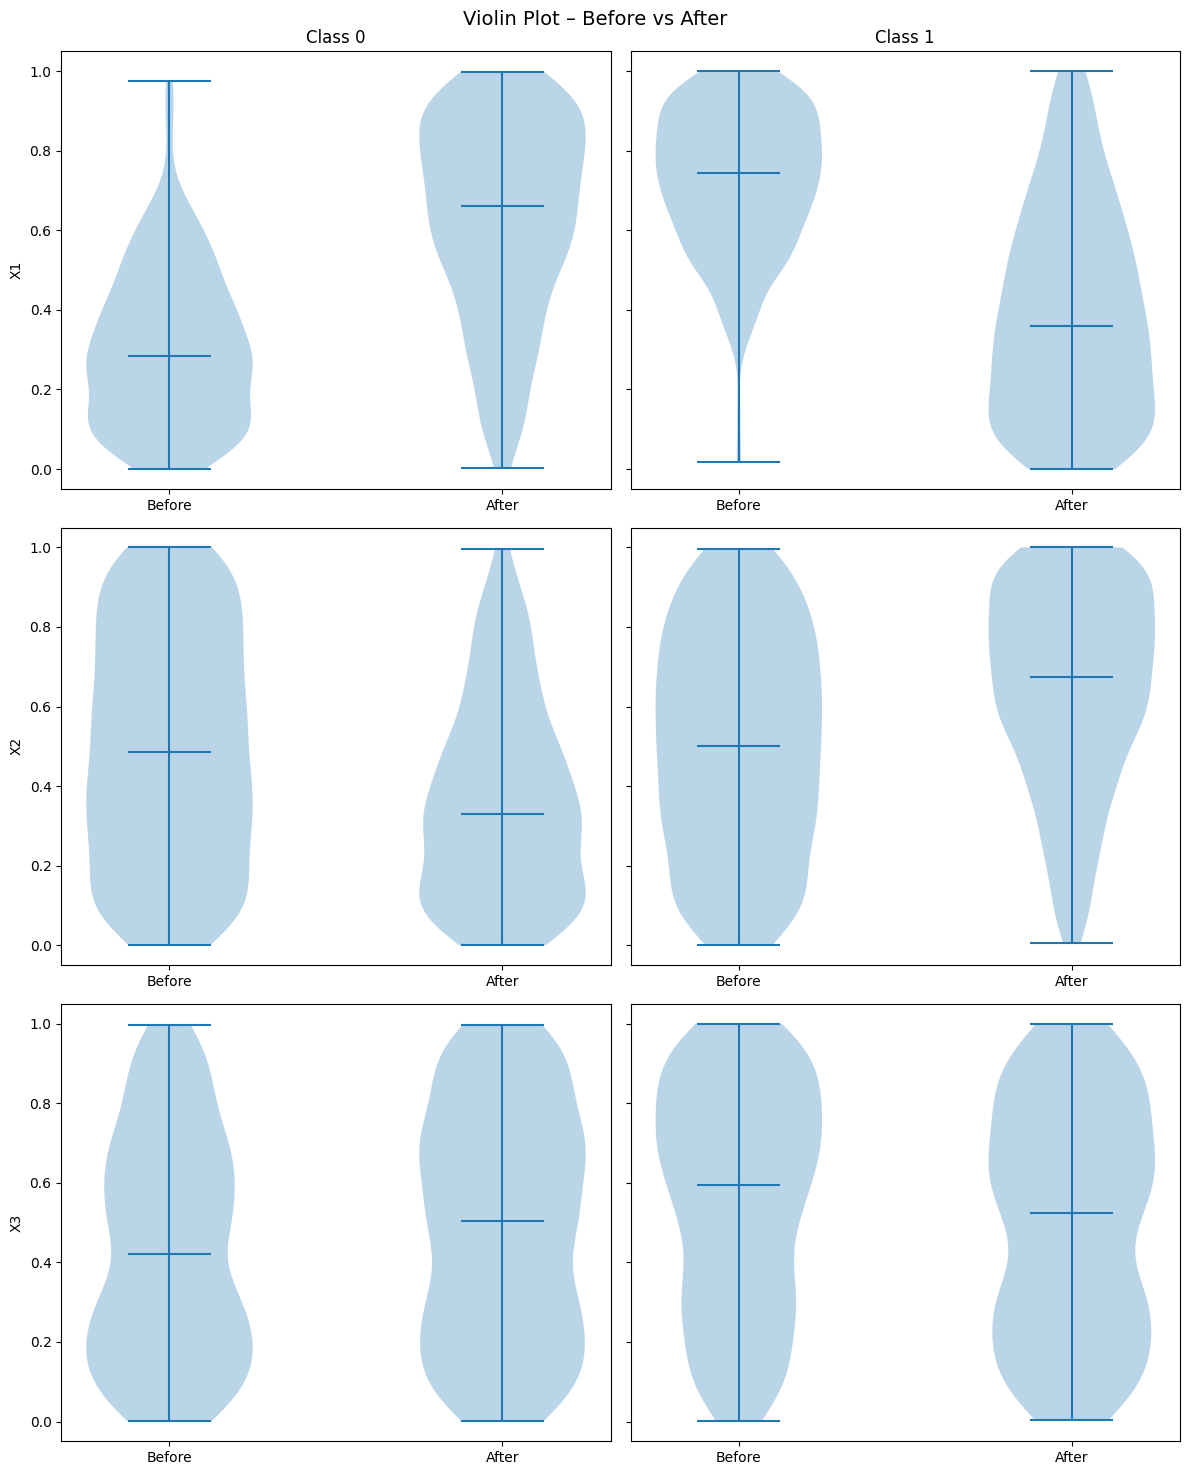

In [16]:
plot_violin(X_old, y_old, X_new, y_new, show_=PlotOptions.Median)

##### **3.2.3.1. Violin Plot with mean**

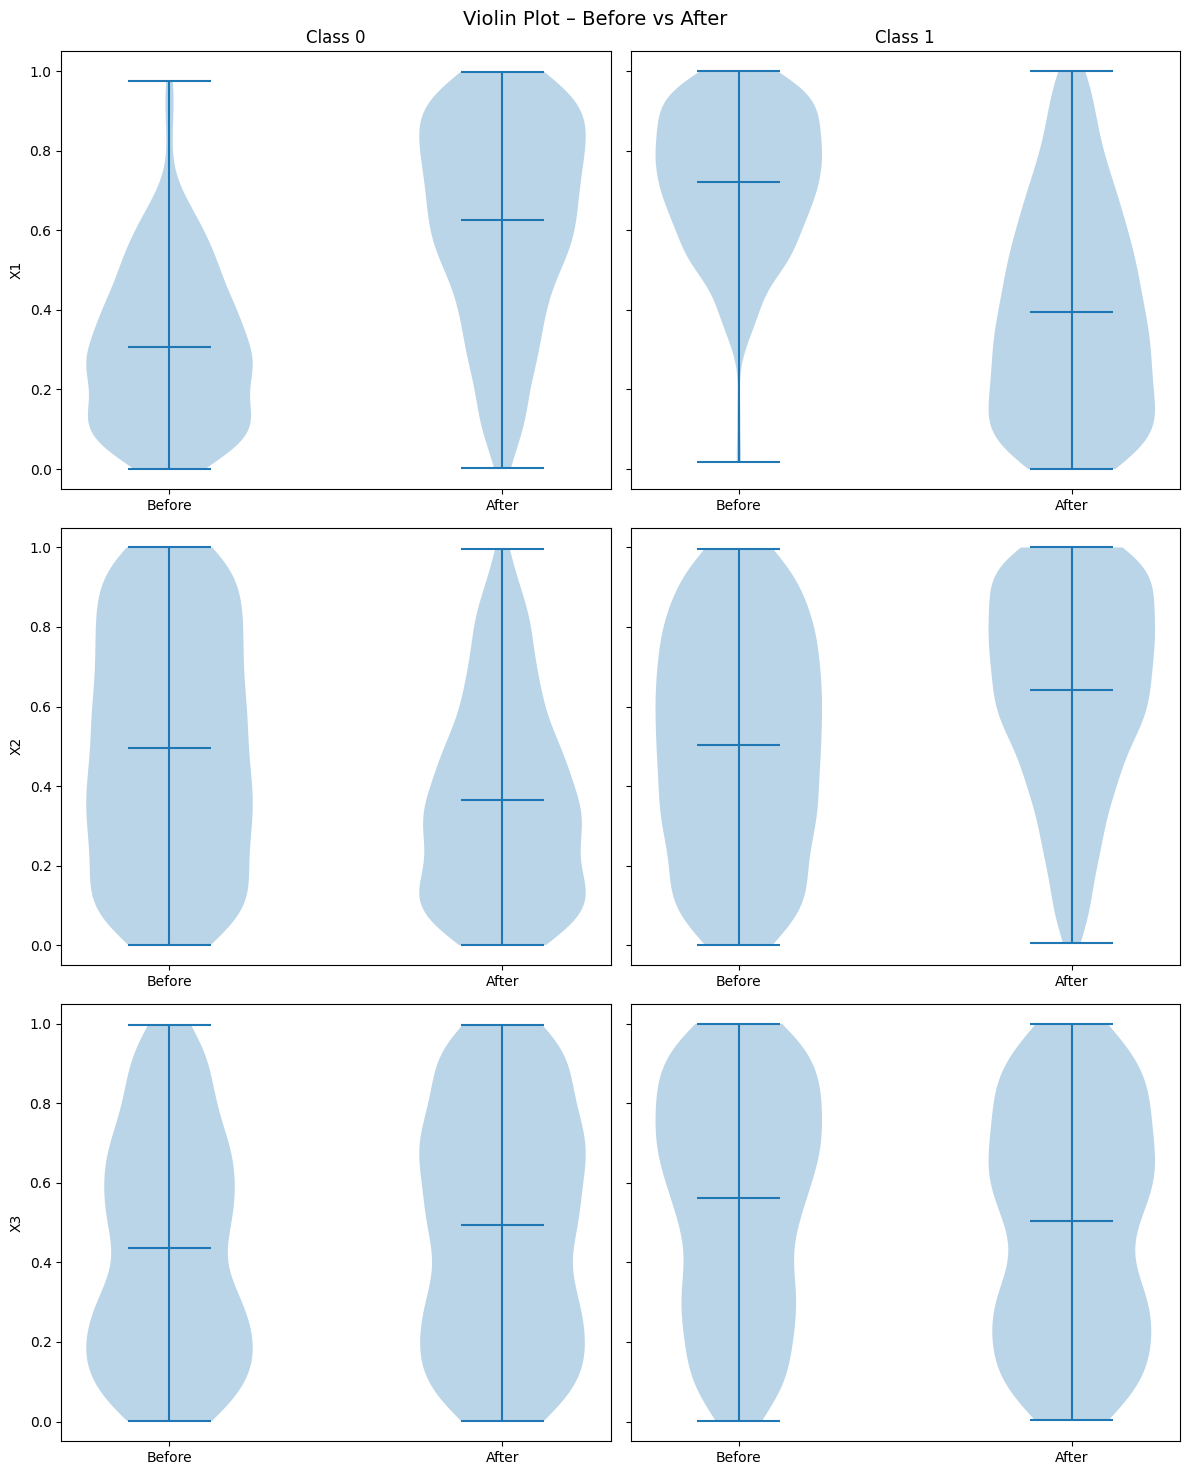

In [17]:
plot_violin(X_old, y_old, X_new, y_new, show_=PlotOptions.Mean)

#### **3.2.4. QQ plot**

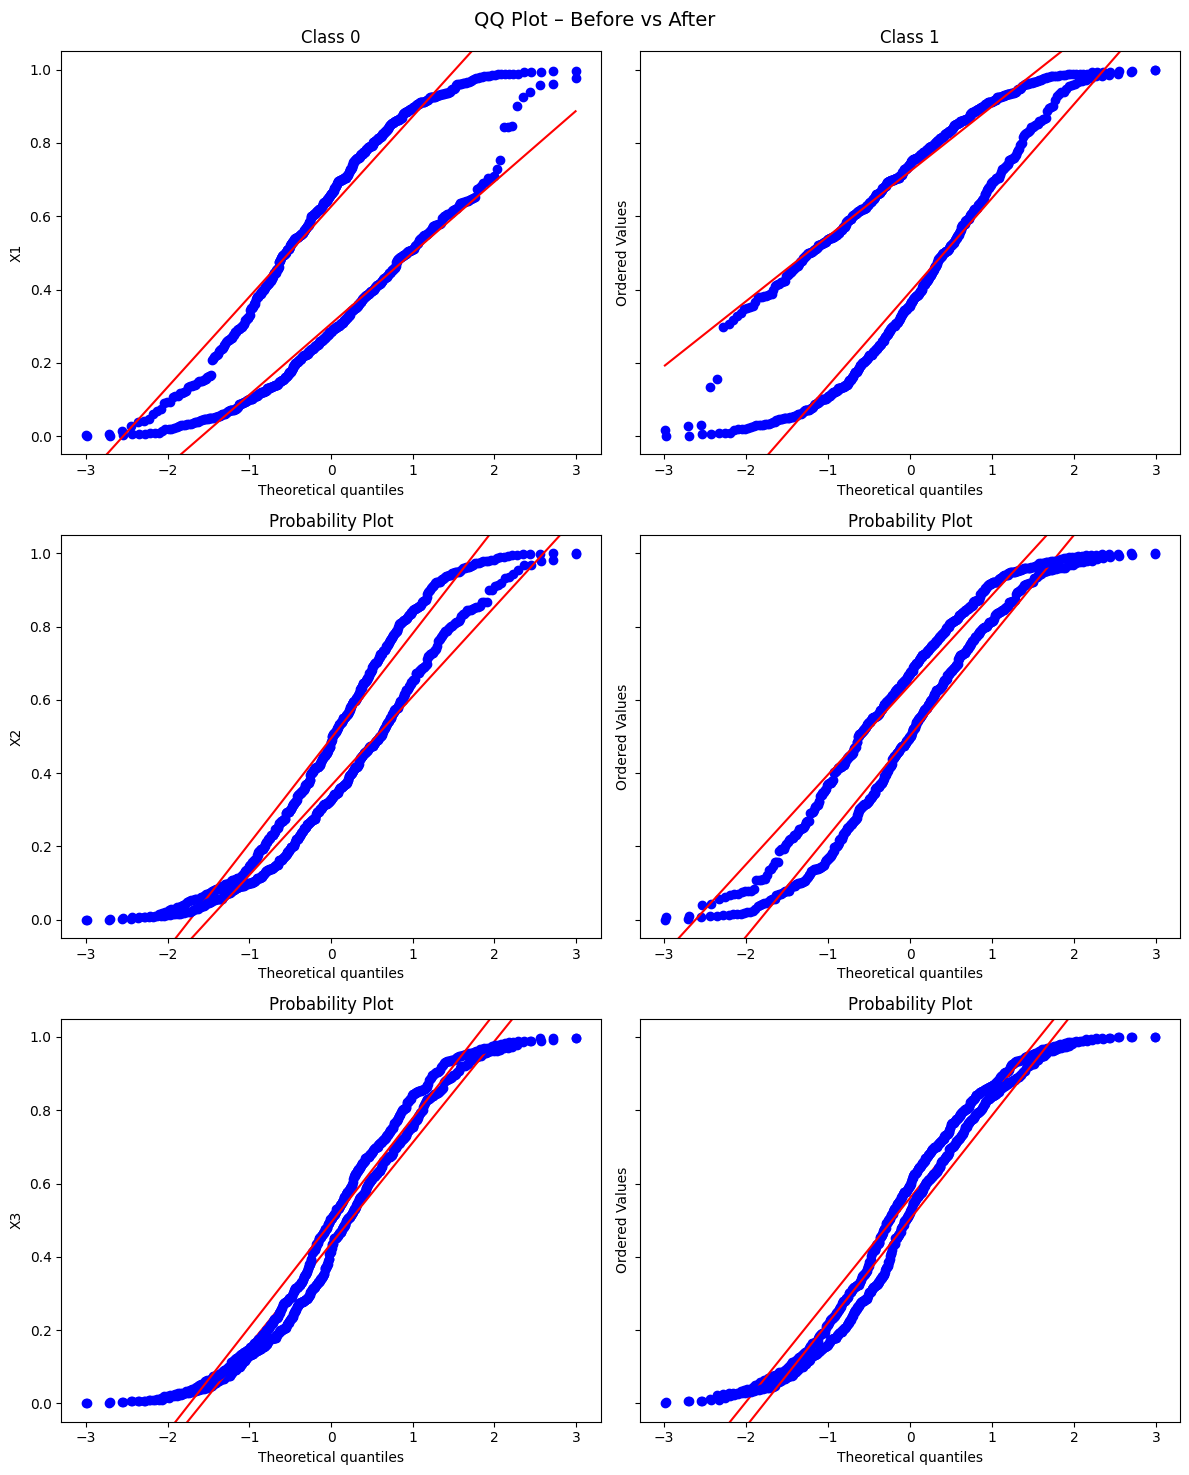

In [13]:
plot_qq(X_old, y_old, X_new, y_new)

#### **3.2.5. Kernel Distribution Estimation (KDE)**

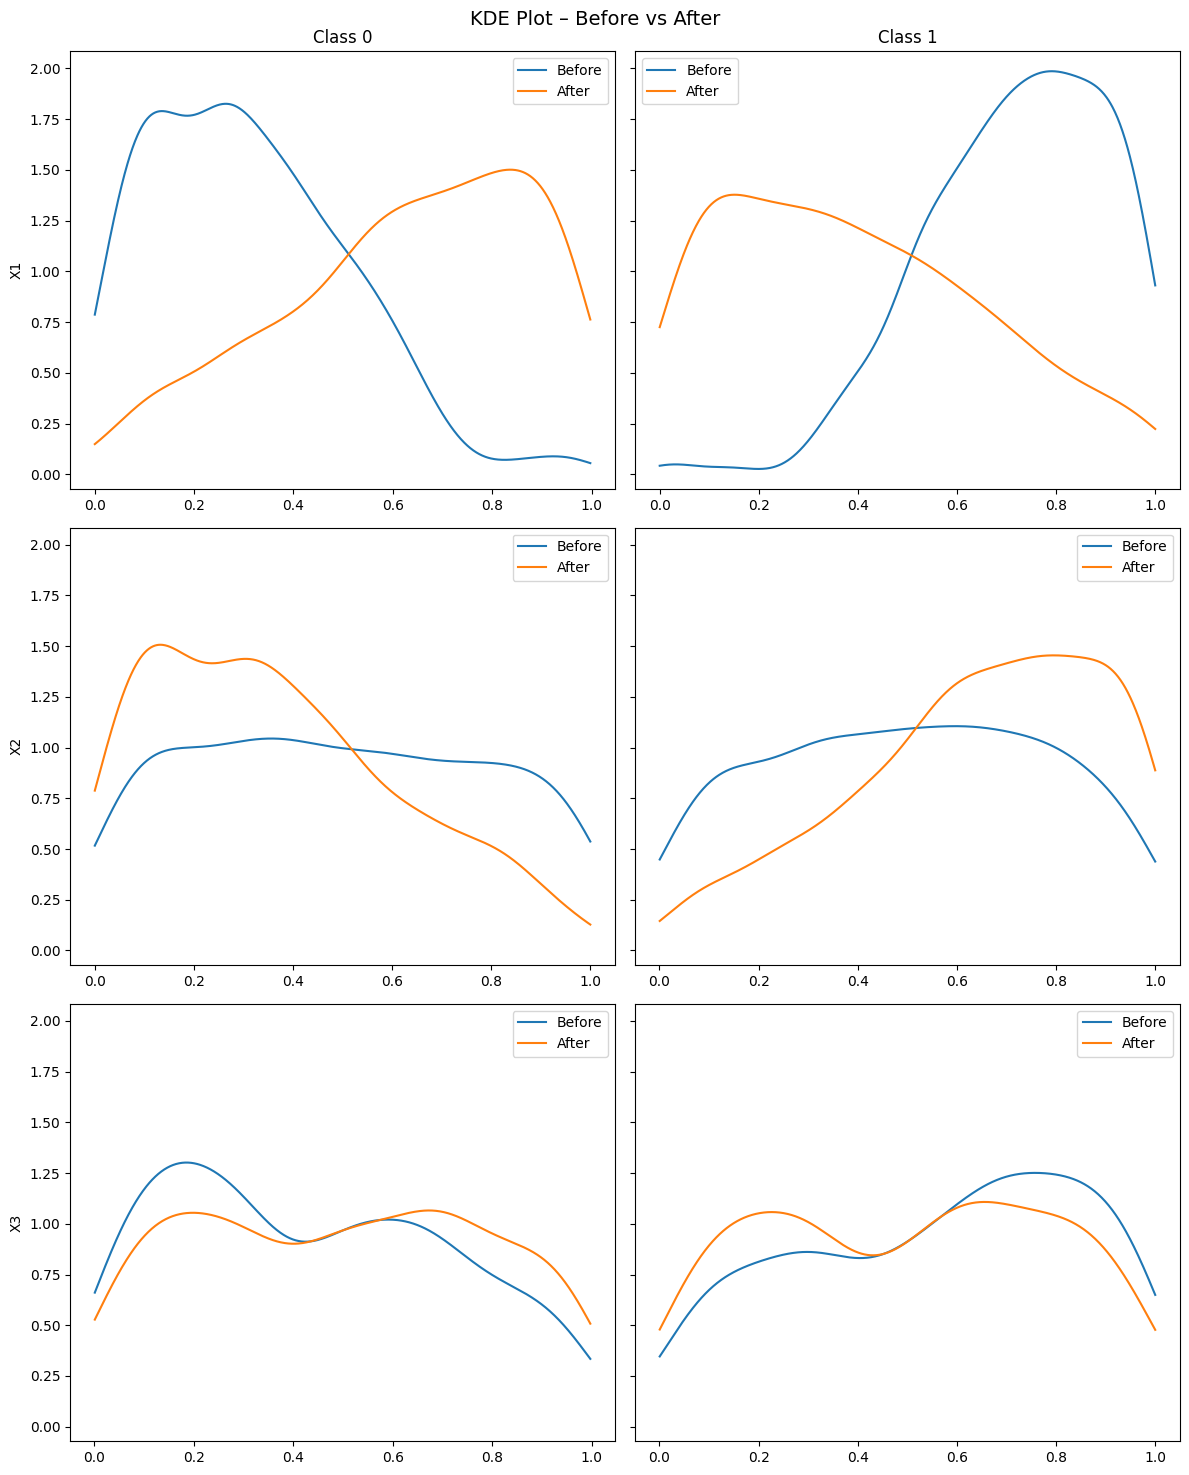

In [12]:
plot_kde(X_old, y_old, X_new, y_new)

#### **3.2.6. Empirical Distribution Function (ECDF)**

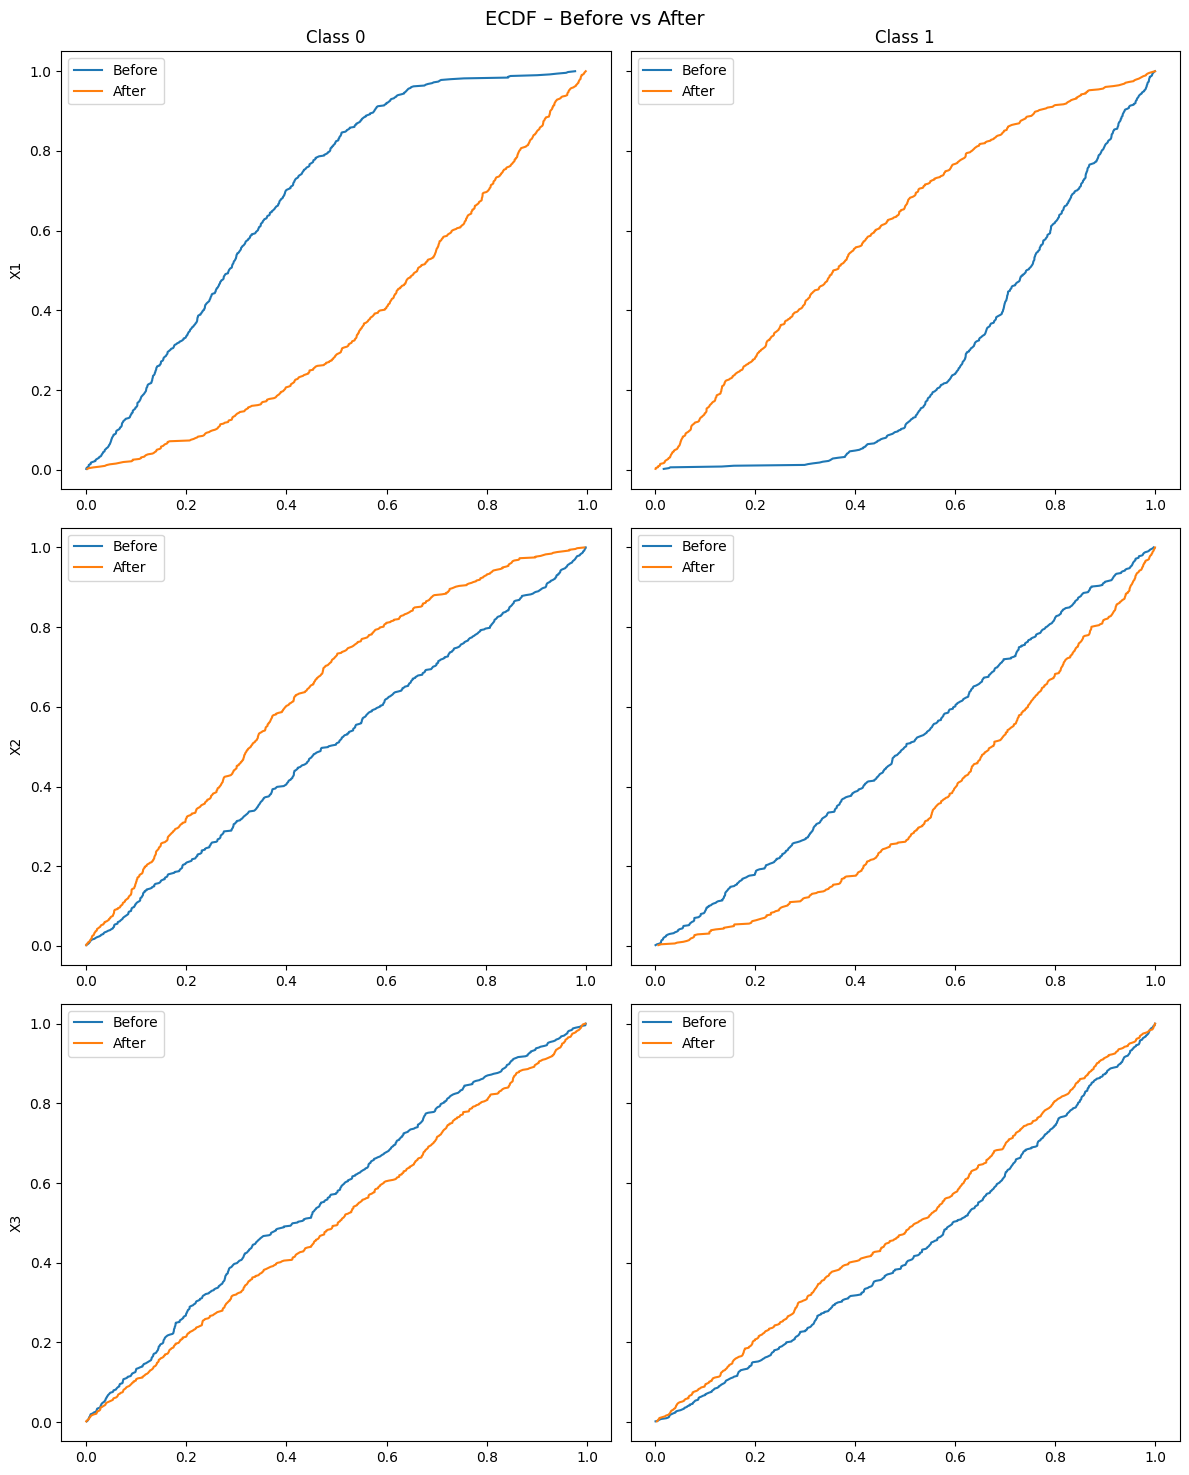

In [14]:
plot_ecdf(X_old, y_old, X_new, y_new)

## **4. Drift Detection With Statistical Tests**

In [4]:
from src.descriptive_statistics.statistical_tests import StatisticalTestsDriftDetector, StatisticalTestType

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/bachelor_venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Possible options to choose from:

In [5]:
print("Possible options to choose from:")
for test_type in StatisticalTestType:
    print(f"    {test_type}")

Possible options to choose from:
    StatisticalTestType.KolmogorovSmirnov
    StatisticalTestType.KullbackLeibler
    StatisticalTestType.WassersteinDistance
    StatisticalTestType.JensenShannon
    StatisticalTestType.Spearman
    StatisticalTestType.AD
    StatisticalTestType.All


Option StatisticalTestType.All means that all tests will be run. It is possible to choose several tests.

### **4.1. Running All option**

In [6]:
STDD = StatisticalTestsDriftDetector(X_old, y_old, X_new, y_new)
STDD.detect(StatisticalTestType.All)

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/descriptive_statistics/statistical_tests.py:223: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  stat, critical, p_value = anderson_ksamp(


np.True_

In [11]:
STDD.drift_flags

{'kolmogorov_smirnov': np.False_,
 'kullback_leibler': np.True_,
 'wasserstein': np.False_,
 'jensen_shannon': np.False_,
 'spearman': np.True_,
 'anderson_darling': np.False_}

In [12]:
STDD.drift_details

{'kolmogorov_smirnov': {0: {'X1': {'drift': True,
    'p_value': np.float64(0.047011687393026205),
    'stat': np.float64(0.12053571428571429)},
   'X2': {'drift': False,
    'p_value': np.float64(0.8944026431396734),
    'stat': np.float64(0.049713010204081635)},
   'X3': {'drift': False,
    'p_value': np.float64(0.25558833849034346),
    'stat': np.float64(0.08880739795918367)}},
  1: {'X1': {'drift': False,
    'p_value': np.float64(0.5121627229882159),
    'stat': np.float64(0.07163291546126647)},
   'X2': {'drift': False,
    'p_value': np.float64(0.5676063854797976),
    'stat': np.float64(0.06856316297010608)},
   'X3': {'drift': False,
    'p_value': np.float64(0.14362887239663774),
    'stat': np.float64(0.10093217614914818)}}},
 'kullback_leibler': {0: {'X1': {'drift': True,
    'kl_div': np.float64(0.4613556084374994)},
   'X2': {'drift': True, 'kl_div': np.float64(0.11084817391302972)},
   'X3': {'drift': True, 'kl_div': np.float64(0.13057970604325841)}},
  1: {'X1': {'dri

### **4.2. Running single test**

In [7]:
STDD = StatisticalTestsDriftDetector(X_old, y_old, X_new, y_new)
STDD.detect(StatisticalTestType.KolmogorovSmirnov)

np.True_

In [9]:
STDD.drift_flags

{'kolmogorov_smirnov': np.True_}

In [8]:
STDD.drift_details

{'kolmogorov_smirnov': {0: {'X1': {'drift': True,
    'p_value': np.float64(4.175204502894924e-70),
    'stat': np.float64(0.5453456022318298)},
   'X2': {'drift': True,
    'p_value': np.float64(9.247052948807188e-12),
    'stat': np.float64(0.22460869766258987)},
   'X3': {'drift': True,
    'p_value': np.float64(0.014792119728017885),
    'stat': np.float64(0.0972032768439954)}},
  1: {'X1': {'drift': True,
    'p_value': np.float64(1.413746567303896e-71),
    'stat': np.float64(0.56068152903317)},
   'X2': {'drift': True,
    'p_value': np.float64(4.754796428303705e-13),
    'stat': np.float64(0.2414538620810085)},
   'X3': {'drift': True,
    'p_value': np.float64(0.016878922141373816),
    'stat': np.float64(0.09770994270699075)}}}}

### **4.3. Running several tests, but not all**

In [10]:
STDD = StatisticalTestsDriftDetector(X_old, y_old, X_new, y_new)
STDD.detect([StatisticalTestType.KolmogorovSmirnov, StatisticalTestType.JensenShannon, StatisticalTestType.KullbackLeibler])

np.True_

In [11]:
STDD.drift_flags

{'kolmogorov_smirnov': np.True_,
 'jensen_shannon': np.True_,
 'kullback_leibler': np.True_}

In [12]:
STDD.drift_details

{'kolmogorov_smirnov': {0: {'X1': {'drift': True,
    'p_value': np.float64(4.175204502894924e-70),
    'stat': np.float64(0.5453456022318298)},
   'X2': {'drift': True,
    'p_value': np.float64(9.247052948807188e-12),
    'stat': np.float64(0.22460869766258987)},
   'X3': {'drift': True,
    'p_value': np.float64(0.014792119728017885),
    'stat': np.float64(0.0972032768439954)}},
  1: {'X1': {'drift': True,
    'p_value': np.float64(1.413746567303896e-71),
    'stat': np.float64(0.56068152903317)},
   'X2': {'drift': True,
    'p_value': np.float64(4.754796428303705e-13),
    'stat': np.float64(0.2414538620810085)},
   'X3': {'drift': True,
    'p_value': np.float64(0.016878922141373816),
    'stat': np.float64(0.09770994270699075)}}},
 'jensen_shannon': {0: {'X1': {'drift': True,
    'js_div': np.float64(0.20557317937311273)},
   'X2': {'drift': False, 'js_div': np.float64(0.04423588374883943)},
   'X3': {'drift': False, 'js_div': np.float64(0.011339402826558289)}},
  1: {'X1': {'d